# CellRegulon example notebook

In [1]:
import cellregulondb as crdb

import pandas as pd
import matplotlib.pyplot as plt

## 1) Load regulon atlas

Download the CellRegulon SQL database and extract a relevant subset by filtering for:
- cell types
- tissues
- transcription factors
- target genes

### Read SQL database

In [2]:
# crdb.download_db(version = 'latest')

In [3]:
db = crdb.CellRegulonDB("../cellregulon-v0.1.0.db")

list the available tissues (same for cell types, genes)

In [4]:
db.tissues.head()

,id,label,obo_id
0,1,heart,obo.UBERON_0000948
1,2,lung parenchyma,obo.UBERON_0008946
2,3,nose,obo.UBERON_0000004
3,4,respiratory airway,obo.UBERON_0001005
4,5,lung,obo.UBERON_0002048


We can select regulons for further analysis, e.g. using only lung regulons:

In [5]:
df = db.get_regulons(tissues = ["lung parenchyma", "respiratory airway"])
df.head()

,transcription_factor,regulation,target_gene,tissue,cell_type,author_cell_type,coexpression,rss
0,AHR,-,KCNAB2,lung parenchyma,respiratory basal cell,respiratory basal cell,0.481348,0.167994
1,AHR,-,RSPH1,lung parenchyma,respiratory basal cell,respiratory basal cell,0.423340,0.167994
2,AHR,-,ST3GAL6,lung parenchyma,respiratory basal cell,respiratory basal cell,0.641020,0.167994
3,ARID5B,+,CD9,lung parenchyma,respiratory basal cell,respiratory basal cell,39.760360,0.170787
4,ARID5B,+,DLK2,lung parenchyma,respiratory basal cell,respiratory basal cell,36.766817,0.170787


### RegulonAtlas (AnnData wrapper)

We load the selected regulons into a RegulonAtlas object:

In [6]:
ra = crdb.RegulonAtlas()

In [7]:
ra.load_from_df(df)

/home/ubuntu/code/cellregulondb/cellregulondb/regulonatlas.py:94: UserWarning: Column 'celltype' not found in `self.adata.obs`. Available columns: ['transcription_factor', 'regulation', 'tissue', 'cell_type', 'author_cell_type', 'rss', 'n_genes'], set `self.cell_type_col` to the correct column name.
  warnings.warn(


To let the object know which annotation columns to use, we can set them like this:

In [8]:
ra.cell_type_col = "author_cell_type"

The selected subset of regulons, with numbers of contained transcription factors, target genes and cell types:

In [9]:
ra

RegulonAtlas object with 20581 regulons, 49 cell types and 5926 target genes.

#### subsetting the RegulonAtlas object

In [10]:
ra = ra.subset(regulons=ra.find_regulons(subset="n_genes > 5").index.tolist())

In [11]:
ra

RegulonAtlas object with 6725 regulons, 48 cell types and 5926 target genes.

#### loading and saving

save the RegulonAtlas object

In [12]:
ra.save("lung_crdb.h5ad")

... storing 'transcription_factor' as categorical
... storing 'regulation' as categorical
... storing 'tissue' as categorical
... storing 'cell_type' as categorical
... storing 'author_cell_type' as categorical


load RegulonAtlas object from file

In [13]:
ra = crdb.RegulonAtlas.load_from_file("lung_crdb.h5ad")

## 2) Look up transcription factors and cell types

### number of target genes across cell types

We can use the RegulonAtlas, for example to see how many target genes it regulates in different cell types. A TF with a large number of targets (a large degree centrality) can be regarded as a hub and may play an important role in that cell type.

In [14]:
TF = "FOXI1"

regulons = ra.find_regulons(transcription_factors=[TF])
regulons.head()

,transcription_factor,regulation,tissue,cell_type,author_cell_type,rss,n_genes
FOXI1 - (+) - brush cell of trachebronchial tree - respiratory airway,FOXI1,+,respiratory airway,brush cell of trachebronchial tree,brush cell of trachebronchial tree,0.169258,26
FOXI1 - (+) - club cell - lung parenchyma,FOXI1,+,lung parenchyma,club cell,club cell,0.173474,8
FOXI1 - (+) - club cell - respiratory airway,FOXI1,+,respiratory airway,club cell,club cell,0.205025,6
FOXI1 - (+) - epithelial cell of alveolus of lung - lung parenchyma,FOXI1,+,lung parenchyma,epithelial cell of alveolus of lung,epithelial cell of alveolus of lung,0.176582,14
FOXI1 - (+) - epithelial cell of alveolus of lung - respiratory airway,FOXI1,+,respiratory airway,epithelial cell of alveolus of lung,epithelial cell of alveolus of lung,0.169625,9


Plotting the DataFrame using pandas and matplotlib shows *FOXI1* has most target genes in ionocytes.

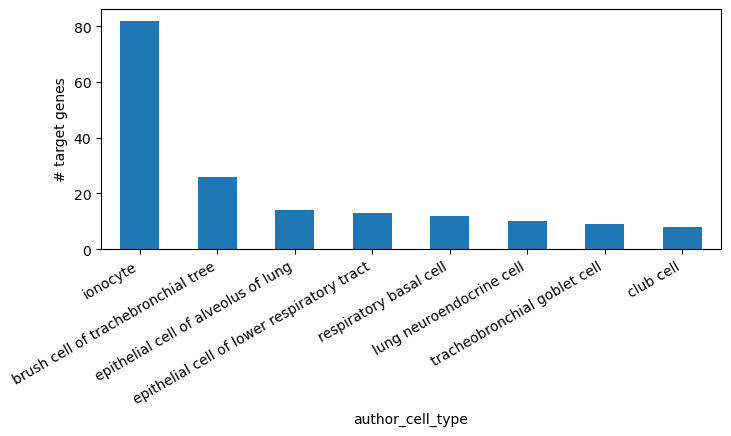

In [15]:
with plt.rc_context({'figure.figsize': (8,5)}):
    plt_df = regulons.astype({ra.cell_type_col: str}).groupby(ra.cell_type_col)['n_genes'].max()
    plt_df.sort_values(ascending=False).plot.bar()
    plt.gcf().subplots_adjust(bottom=0.4)
    plt.ylabel("# target genes")
    plt.xticks(rotation=30, ha="right")
    plt.show()

### getting a list of target genes

Checking the target genes of a TF is easy. Let's say we want to find target genes of *FOXI1* in ionocytes.

In [16]:
regulons = ra.find_regulons(transcription_factors=[TF], cell_types=['ionocyte']).index.tolist()

In [17]:
ra.get_target_genes(regulons)[:10]

['HMGB3',
 'ASCL3',
 'HES6',
 'CFTR',
 'LINC01187',
 'AMACR',
 'HEPACAM2',
 'PACRG',
 'CEL',
 'STAP1']

### getting a list of transcription factors

What TFs regulate *FOXI1*?

In [18]:
regulons = ra.find_regulons(target_genes = ["FOXI1"])
regulons.head()

,transcription_factor,regulation,tissue,cell_type,author_cell_type,rss,n_genes
BHLHE40 - (+) - brush cell of trachebronchial tree - respiratory airway,BHLHE40,+,respiratory airway,brush cell of trachebronchial tree,brush cell of trachebronchial tree,0.167722,27
BHLHE40 - (+) - ionocyte - lung parenchyma,BHLHE40,+,lung parenchyma,ionocyte,ionocyte,0.167547,28
BHLHE40 - (+) - ionocyte - respiratory airway,BHLHE40,+,respiratory airway,ionocyte,ionocyte,0.167826,15
CREB3L2 - (+) - brush cell of trachebronchial tree - respiratory airway,CREB3L2,+,respiratory airway,brush cell of trachebronchial tree,brush cell of trachebronchial tree,0.167589,15
CREB3L2 - (+) - ionocyte - lung parenchyma,CREB3L2,+,lung parenchyma,ionocyte,ionocyte,0.167538,12


What other TFs play a role in ionocytes?

In [19]:
regulons = ra.find_regulons(cell_types=["ionocyte"], subset="regulation == '+'")

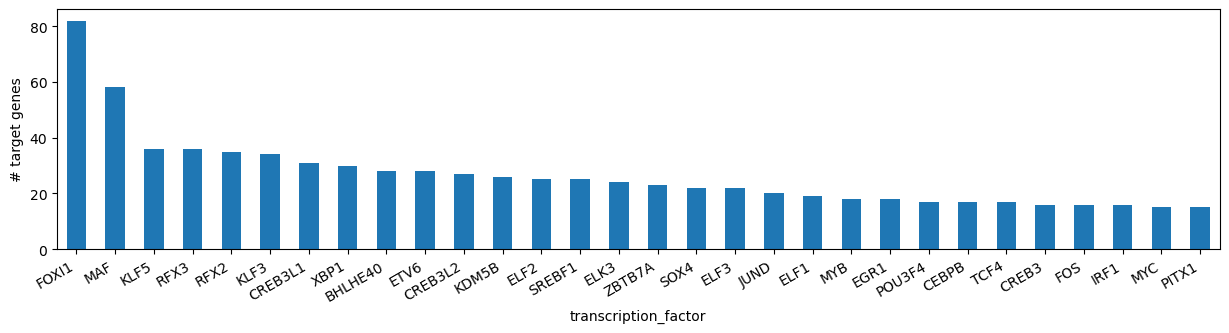

In [20]:
with plt.rc_context({'figure.figsize': (15,5)}):
    plt_df = regulons.astype({ra.transcription_factor_col: str}).groupby(ra.transcription_factor_col)['n_genes'].max()
    plt_df.sort_values(ascending=False)[:30].plot.bar()
    plt.gcf().subplots_adjust(bottom=0.4)
    plt.ylabel("# target genes")
    plt.xticks(rotation=30, ha="right")
    plt.show()

### clustering regulons

To get a better overview, clusters of regulons that co-regulate groups of target genes can be visualised in an embedding. 
For the embedding we use the jaccard coefficients as a metric, which measures the overlap of target genes between regulons.
Then, a knn-graph is constructed and UMAP is used to visualise the regulon similarities in 2 dimensions.

In [21]:
ra_sub = ra.subset(regulons.index.tolist())

ra_sub

RegulonAtlas object with 135 regulons, 1 cell types and 5926 target genes.

In [ ]:
ra_sub.calculate_embedding(add_leiden=0.7)

ra_sub.plot_embedding(color=["leiden", ra_sub.cell_type_col, ra_sub.transcription_factor_col])

/home/ubuntu/miniforge3/crdb/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2350: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/ubuntu/miniforge3/crdb/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### gene set enrichment of clusters

g:profiler provides a simple interface to perform overrepresentation analysis on various gene sets.

CellRegulon additionally provides wrappers for enrichment and plotting (by default using GO:BP, KEGG and WP).

In [ ]:
cluster_tgs = ra_sub.get_target_genes_by("leiden", min_regulon=4)


cl_res = {}
for cl, qg in cluster_tgs.items():
    enr = crdb.query_gprofiler(qg, plot=False)
    
    crdb.plot_enrichment(enr, title=f"cluster {cl}", show=True)

    cl_res[cl] = {'enrichment': enr, 'gene_set': qg}

Checking enrichment results in a table:

In [ ]:
cl_res['1']['enrichment'][['name', 'p_value', 'native', 'intersections', 'evidences']][-10:].iloc[::-1].head()

## 3) Find regulons matching an external gene set

We use a gene set for cystic fibrosis from [Harmonizome](https://maayanlab.cloud/Harmonizome/gene_set/cystic+fibrosis/DISEASES+Text-mining+Gene-Disease+Assocation+Evidence+Scores) (Maayan lab) that is based on text mining of biomedical publications.

In [ ]:
dct = {"attribute":{"name":"cystic fibrosis","href":"/api/1.0/attribute/cystic+fibrosis"},"dataset":{"name":"DISEASES Text-mining Gene-Disease Assocation Evidence Scores","href":"/api/1.0/dataset/DISEASES+Text-mining+Gene-Disease+Assocation+Evidence+Scores"},"associations":[{"gene":{"symbol":"ANO10","href":"/api/1.0/gene/ANO10"},"thresholdValue":1.0,"standardizedValue":0.163938},{"gene":{"symbol":"CCL3","href":"/api/1.0/gene/CCL3"},"thresholdValue":1.0,"standardizedValue":0.225573},{"gene":{"symbol":"INS","href":"/api/1.0/gene/INS"},"thresholdValue":1.0,"standardizedValue":1.26037},{"gene":{"symbol":"STX5","href":"/api/1.0/gene/STX5"},"thresholdValue":1.0,"standardizedValue":0.157929},{"gene":{"symbol":"CLDN1","href":"/api/1.0/gene/CLDN1"},"thresholdValue":1.0,"standardizedValue":0.257005},{"gene":{"symbol":"KCNH5","href":"/api/1.0/gene/KCNH5"},"thresholdValue":1.0,"standardizedValue":0.169571},{"gene":{"symbol":"SCNN1A","href":"/api/1.0/gene/SCNN1A"},"thresholdValue":1.0,"standardizedValue":0.959123},{"gene":{"symbol":"ITGA2","href":"/api/1.0/gene/ITGA2"},"thresholdValue":1.0,"standardizedValue":0.33651},{"gene":{"symbol":"DNASE2B","href":"/api/1.0/gene/DNASE2B"},"thresholdValue":1.0,"standardizedValue":0.170299},{"gene":{"symbol":"ATP6AP1","href":"/api/1.0/gene/ATP6AP1"},"thresholdValue":1.0,"standardizedValue":1.21219},{"gene":{"symbol":"GGT2","href":"/api/1.0/gene/GGT2"},"thresholdValue":1.0,"standardizedValue":0.196139},{"gene":{"symbol":"DUOX1","href":"/api/1.0/gene/DUOX1"},"thresholdValue":1.0,"standardizedValue":0.220424},{"gene":{"symbol":"SLC26A2","href":"/api/1.0/gene/SLC26A2"},"thresholdValue":1.0,"standardizedValue":0.499231},{"gene":{"symbol":"PGM3","href":"/api/1.0/gene/PGM3"},"thresholdValue":1.0,"standardizedValue":0.746391},{"gene":{"symbol":"CANX","href":"/api/1.0/gene/CANX"},"thresholdValue":1.0,"standardizedValue":1.14687},{"gene":{"symbol":"ADCY8","href":"/api/1.0/gene/ADCY8"},"thresholdValue":1.0,"standardizedValue":0.309204},{"gene":{"symbol":"SEPT8","href":"/api/1.0/gene/SEPT8"},"thresholdValue":1.0,"standardizedValue":0.207578},{"gene":{"symbol":"CCL20","href":"/api/1.0/gene/CCL20"},"thresholdValue":1.0,"standardizedValue":0.188632},{"gene":{"symbol":"CXCR2","href":"/api/1.0/gene/CXCR2"},"thresholdValue":1.0,"standardizedValue":0.720865},{"gene":{"symbol":"FOXJ1","href":"/api/1.0/gene/FOXJ1"},"thresholdValue":1.0,"standardizedValue":0.558285},{"gene":{"symbol":"ELANE","href":"/api/1.0/gene/ELANE"},"thresholdValue":1.0,"standardizedValue":2.10904},{"gene":{"symbol":"CTRC","href":"/api/1.0/gene/CTRC"},"thresholdValue":1.0,"standardizedValue":0.704742},{"gene":{"symbol":"SUMF2","href":"/api/1.0/gene/SUMF2"},"thresholdValue":1.0,"standardizedValue":1.16821},{"gene":{"symbol":"HDAC2","href":"/api/1.0/gene/HDAC2"},"thresholdValue":1.0,"standardizedValue":0.388166},{"gene":{"symbol":"SBDS","href":"/api/1.0/gene/SBDS"},"thresholdValue":1.0,"standardizedValue":0.536183},{"gene":{"symbol":"TLR1","href":"/api/1.0/gene/TLR1"},"thresholdValue":1.0,"standardizedValue":0.282225},{"gene":{"symbol":"NFKBIA","href":"/api/1.0/gene/NFKBIA"},"thresholdValue":1.0,"standardizedValue":0.596012},{"gene":{"symbol":"CR1","href":"/api/1.0/gene/CR1"},"thresholdValue":1.0,"standardizedValue":0.260891},{"gene":{"symbol":"ABCB4","href":"/api/1.0/gene/ABCB4"},"thresholdValue":1.0,"standardizedValue":0.328834},{"gene":{"symbol":"SRI","href":"/api/1.0/gene/SRI"},"thresholdValue":1.0,"standardizedValue":0.239101},{"gene":{"symbol":"LYZ","href":"/api/1.0/gene/LYZ"},"thresholdValue":1.0,"standardizedValue":0.935799},{"gene":{"symbol":"SFTPA2","href":"/api/1.0/gene/SFTPA2"},"thresholdValue":1.0,"standardizedValue":0.561392},{"gene":{"symbol":"IL1A","href":"/api/1.0/gene/IL1A"},"thresholdValue":1.0,"standardizedValue":0.403811},{"gene":{"symbol":"STAT6","href":"/api/1.0/gene/STAT6"},"thresholdValue":1.0,"standardizedValue":0.305226},{"gene":{"symbol":"ANO2","href":"/api/1.0/gene/ANO2"},"thresholdValue":1.0,"standardizedValue":0.445052},{"gene":{"symbol":"PKM","href":"/api/1.0/gene/PKM"},"thresholdValue":1.0,"standardizedValue":0.287235},{"gene":{"symbol":"CLDN7","href":"/api/1.0/gene/CLDN7"},"thresholdValue":1.0,"standardizedValue":0.244345},{"gene":{"symbol":"DMD","href":"/api/1.0/gene/DMD"},"thresholdValue":1.0,"standardizedValue":0.165001},{"gene":{"symbol":"DEFB1","href":"/api/1.0/gene/DEFB1"},"thresholdValue":1.0,"standardizedValue":0.993596},{"gene":{"symbol":"DECR1","href":"/api/1.0/gene/DECR1"},"thresholdValue":1.0,"standardizedValue":0.624143},{"gene":{"symbol":"AMBP","href":"/api/1.0/gene/AMBP"},"thresholdValue":1.0,"standardizedValue":0.387794},{"gene":{"symbol":"ABCC1","href":"/api/1.0/gene/ABCC1"},"thresholdValue":1.0,"standardizedValue":0.573828},{"gene":{"symbol":"GGT1","href":"/api/1.0/gene/GGT1"},"thresholdValue":1.0,"standardizedValue":0.663181},{"gene":{"symbol":"IL9R","href":"/api/1.0/gene/IL9R"},"thresholdValue":1.0,"standardizedValue":0.538118},{"gene":{"symbol":"TGM2","href":"/api/1.0/gene/TGM2"},"thresholdValue":1.0,"standardizedValue":0.275445},{"gene":{"symbol":"P2RY4","href":"/api/1.0/gene/P2RY4"},"thresholdValue":1.0,"standardizedValue":0.458996},{"gene":{"symbol":"MUC2","href":"/api/1.0/gene/MUC2"},"thresholdValue":1.0,"standardizedValue":1.26037},{"gene":{"symbol":"RBM23","href":"/api/1.0/gene/RBM23"},"thresholdValue":1.0,"standardizedValue":0.216332},{"gene":{"symbol":"GPX4","href":"/api/1.0/gene/GPX4"},"thresholdValue":1.0,"standardizedValue":0.416896},{"gene":{"symbol":"DNASE1","href":"/api/1.0/gene/DNASE1"},"thresholdValue":1.0,"standardizedValue":2.22659},{"gene":{"symbol":"BPIFA1","href":"/api/1.0/gene/BPIFA1"},"thresholdValue":1.0,"standardizedValue":0.452208},{"gene":{"symbol":"HBD","href":"/api/1.0/gene/HBD"},"thresholdValue":1.0,"standardizedValue":0.220424},{"gene":{"symbol":"CCP110","href":"/api/1.0/gene/CCP110"},"thresholdValue":1.0,"standardizedValue":0.31464},{"gene":{"symbol":"NFKBIB","href":"/api/1.0/gene/NFKBIB"},"thresholdValue":1.0,"standardizedValue":0.276158},{"gene":{"symbol":"HSPA4","href":"/api/1.0/gene/HSPA4"},"thresholdValue":1.0,"standardizedValue":0.616312},{"gene":{"symbol":"PSMB3","href":"/api/1.0/gene/PSMB3"},"thresholdValue":1.0,"standardizedValue":0.212945},{"gene":{"symbol":"ICK","href":"/api/1.0/gene/ICK"},"thresholdValue":1.0,"standardizedValue":0.453716},{"gene":{"symbol":"GSTA2","href":"/api/1.0/gene/GSTA2"},"thresholdValue":1.0,"standardizedValue":0.406425},{"gene":{"symbol":"F2","href":"/api/1.0/gene/F2"},"thresholdValue":1.0,"standardizedValue":0.406798},{"gene":{"symbol":"SLPI","href":"/api/1.0/gene/SLPI"},"thresholdValue":1.0,"standardizedValue":1.27388},{"gene":{"symbol":"ATP5J","href":"/api/1.0/gene/ATP5J"},"thresholdValue":1.0,"standardizedValue":0.660008},{"gene":{"symbol":"EEA1","href":"/api/1.0/gene/EEA1"},"thresholdValue":1.0,"standardizedValue":0.25207},{"gene":{"symbol":"ST14","href":"/api/1.0/gene/ST14"},"thresholdValue":1.0,"standardizedValue":0.172038},{"gene":{"symbol":"PANX1","href":"/api/1.0/gene/PANX1"},"thresholdValue":1.0,"standardizedValue":0.387794},{"gene":{"symbol":"ADO","href":"/api/1.0/gene/ADO"},"thresholdValue":1.0,"standardizedValue":0.940364},{"gene":{"symbol":"COL1A2","href":"/api/1.0/gene/COL1A2"},"thresholdValue":1.0,"standardizedValue":0.457864},{"gene":{"symbol":"SYTL5","href":"/api/1.0/gene/SYTL5"},"thresholdValue":1.0,"standardizedValue":0.340173},{"gene":{"symbol":"TOM1","href":"/api/1.0/gene/TOM1"},"thresholdValue":1.0,"standardizedValue":0.459751},{"gene":{"symbol":"HPR","href":"/api/1.0/gene/HPR"},"thresholdValue":1.0,"standardizedValue":0.371107},{"gene":{"symbol":"RIPK4","href":"/api/1.0/gene/RIPK4"},"thresholdValue":1.0,"standardizedValue":0.385193},{"gene":{"symbol":"SOCS2","href":"/api/1.0/gene/SOCS2"},"thresholdValue":1.0,"standardizedValue":0.158266},{"gene":{"symbol":"MMAA","href":"/api/1.0/gene/MMAA"},"thresholdValue":1.0,"standardizedValue":1.58002},{"gene":{"symbol":"VDAC1","href":"/api/1.0/gene/VDAC1"},"thresholdValue":1.0,"standardizedValue":0.40008},{"gene":{"symbol":"ABCB1","href":"/api/1.0/gene/ABCB1"},"thresholdValue":1.0,"standardizedValue":0.693098},{"gene":{"symbol":"ANO1","href":"/api/1.0/gene/ANO1"},"thresholdValue":1.0,"standardizedValue":1.21478},{"gene":{"symbol":"IL17A","href":"/api/1.0/gene/IL17A"},"thresholdValue":1.0,"standardizedValue":0.186811},{"gene":{"symbol":"PRSS3","href":"/api/1.0/gene/PRSS3"},"thresholdValue":1.0,"standardizedValue":0.908553},{"gene":{"symbol":"DCTD","href":"/api/1.0/gene/DCTD"},"thresholdValue":1.0,"standardizedValue":0.193285},{"gene":{"symbol":"S100A10","href":"/api/1.0/gene/S100A10"},"thresholdValue":1.0,"standardizedValue":0.396353},{"gene":{"symbol":"POTEI","href":"/api/1.0/gene/POTEI"},"thresholdValue":1.0,"standardizedValue":0.33944},{"gene":{"symbol":"SOD2","href":"/api/1.0/gene/SOD2"},"thresholdValue":1.0,"standardizedValue":0.46655},{"gene":{"symbol":"NOS2","href":"/api/1.0/gene/NOS2"},"thresholdValue":1.0,"standardizedValue":0.368888},{"gene":{"symbol":"GC","href":"/api/1.0/gene/GC"},"thresholdValue":1.0,"standardizedValue":0.439034},{"gene":{"symbol":"ETV3","href":"/api/1.0/gene/ETV3"},"thresholdValue":1.0,"standardizedValue":0.257711},{"gene":{"symbol":"RHOQ","href":"/api/1.0/gene/RHOQ"},"thresholdValue":1.0,"standardizedValue":0.455601},{"gene":{"symbol":"ADRA1D","href":"/api/1.0/gene/ADRA1D"},"thresholdValue":1.0,"standardizedValue":0.235964},{"gene":{"symbol":"MUC1","href":"/api/1.0/gene/MUC1"},"thresholdValue":1.0,"standardizedValue":0.622575},{"gene":{"symbol":"CD79A","href":"/api/1.0/gene/CD79A"},"thresholdValue":1.0,"standardizedValue":1.0627},{"gene":{"symbol":"SVIP","href":"/api/1.0/gene/SVIP"},"thresholdValue":1.0,"standardizedValue":0.55712},{"gene":{"symbol":"FPR2","href":"/api/1.0/gene/FPR2"},"thresholdValue":1.0,"standardizedValue":0.422515},{"gene":{"symbol":"ABCA3","href":"/api/1.0/gene/ABCA3"},"thresholdValue":1.0,"standardizedValue":0.355972},{"gene":{"symbol":"IL10","href":"/api/1.0/gene/IL10"},"thresholdValue":1.0,"standardizedValue":0.423265},{"gene":{"symbol":"SFTPC","href":"/api/1.0/gene/SFTPC"},"thresholdValue":1.0,"standardizedValue":0.183835},{"gene":{"symbol":"FAM120B","href":"/api/1.0/gene/FAM120B"},"thresholdValue":1.0,"standardizedValue":0.251718},{"gene":{"symbol":"MUC4","href":"/api/1.0/gene/MUC4"},"thresholdValue":1.0,"standardizedValue":1.09083},{"gene":{"symbol":"UBC","href":"/api/1.0/gene/UBC"},"thresholdValue":1.0,"standardizedValue":0.298011},{"gene":{"symbol":"DNAH8","href":"/api/1.0/gene/DNAH8"},"thresholdValue":1.0,"standardizedValue":1.34112},{"gene":{"symbol":"LGALS7","href":"/api/1.0/gene/LGALS7"},"thresholdValue":1.0,"standardizedValue":0.541992},{"gene":{"symbol":"MLN","href":"/api/1.0/gene/MLN"},"thresholdValue":1.0,"standardizedValue":0.316456},{"gene":{"symbol":"RSPH9","href":"/api/1.0/gene/RSPH9"},"thresholdValue":1.0,"standardizedValue":0.307757},{"gene":{"symbol":"AQP5","href":"/api/1.0/gene/AQP5"},"thresholdValue":1.0,"standardizedValue":0.401572},{"gene":{"symbol":"POTEF","href":"/api/1.0/gene/POTEF"},"thresholdValue":1.0,"standardizedValue":0.342006},{"gene":{"symbol":"SLC9A3R1","href":"/api/1.0/gene/SLC9A3R1"},"thresholdValue":1.0,"standardizedValue":1.44518},{"gene":{"symbol":"PDE5A","href":"/api/1.0/gene/PDE5A"},"thresholdValue":1.0,"standardizedValue":0.239799},{"gene":{"symbol":"CYP21A2","href":"/api/1.0/gene/CYP21A2"},"thresholdValue":1.0,"standardizedValue":0.162707},{"gene":{"symbol":"TGFB1","href":"/api/1.0/gene/TGFB1"},"thresholdValue":1.0,"standardizedValue":0.587833},{"gene":{"symbol":"SLC26A4","href":"/api/1.0/gene/SLC26A4"},"thresholdValue":1.0,"standardizedValue":0.317545},{"gene":{"symbol":"COPE","href":"/api/1.0/gene/COPE"},"thresholdValue":1.0,"standardizedValue":0.436778},{"gene":{"symbol":"TLR2","href":"/api/1.0/gene/TLR2"},"thresholdValue":1.0,"standardizedValue":0.939534},{"gene":{"symbol":"PNLIP","href":"/api/1.0/gene/PNLIP"},"thresholdValue":1.0,"standardizedValue":1.23646},{"gene":{"symbol":"TLR5","href":"/api/1.0/gene/TLR5"},"thresholdValue":1.0,"standardizedValue":1.13797},{"gene":{"symbol":"IGFBP3","href":"/api/1.0/gene/IGFBP3"},"thresholdValue":1.0,"standardizedValue":0.531541},{"gene":{"symbol":"GSTA3","href":"/api/1.0/gene/GSTA3"},"thresholdValue":1.0,"standardizedValue":0.407545},{"gene":{"symbol":"TREH","href":"/api/1.0/gene/TREH"},"thresholdValue":1.0,"standardizedValue":0.764718},{"gene":{"symbol":"VIP","href":"/api/1.0/gene/VIP"},"thresholdValue":1.0,"standardizedValue":0.965825},{"gene":{"symbol":"CALM2","href":"/api/1.0/gene/CALM2"},"thresholdValue":1.0,"standardizedValue":0.868368},{"gene":{"symbol":"PLA2G4C","href":"/api/1.0/gene/PLA2G4C"},"thresholdValue":1.0,"standardizedValue":0.482084},{"gene":{"symbol":"SPDEF","href":"/api/1.0/gene/SPDEF"},"thresholdValue":1.0,"standardizedValue":0.31029},{"gene":{"symbol":"TMPRSS15","href":"/api/1.0/gene/TMPRSS15"},"thresholdValue":1.0,"standardizedValue":0.507273},{"gene":{"symbol":"F5","href":"/api/1.0/gene/F5"},"thresholdValue":1.0,"standardizedValue":0.228679},{"gene":{"symbol":"KRT18","href":"/api/1.0/gene/KRT18"},"thresholdValue":1.0,"standardizedValue":0.652484},{"gene":{"symbol":"RBP3","href":"/api/1.0/gene/RBP3"},"thresholdValue":1.0,"standardizedValue":0.225229},{"gene":{"symbol":"HDAC9","href":"/api/1.0/gene/HDAC9"},"thresholdValue":1.0,"standardizedValue":0.279011},{"gene":{"symbol":"IL2RA","href":"/api/1.0/gene/IL2RA"},"thresholdValue":1.0,"standardizedValue":0.163317},{"gene":{"symbol":"CEACAM3","href":"/api/1.0/gene/CEACAM3"},"thresholdValue":1.0,"standardizedValue":0.3292},{"gene":{"symbol":"AZU1","href":"/api/1.0/gene/AZU1"},"thresholdValue":1.0,"standardizedValue":0.212945},{"gene":{"symbol":"PLA2G2C","href":"/api/1.0/gene/PLA2G2C"},"thresholdValue":1.0,"standardizedValue":0.551686},{"gene":{"symbol":"CAT","href":"/api/1.0/gene/CAT"},"thresholdValue":1.0,"standardizedValue":0.531154},{"gene":{"symbol":"GJC1","href":"/api/1.0/gene/GJC1"},"thresholdValue":1.0,"standardizedValue":0.315003},{"gene":{"symbol":"LCN2","href":"/api/1.0/gene/LCN2"},"thresholdValue":1.0,"standardizedValue":0.180367},{"gene":{"symbol":"MRI1","href":"/api/1.0/gene/MRI1"},"thresholdValue":1.0,"standardizedValue":0.242245},{"gene":{"symbol":"PIGR","href":"/api/1.0/gene/PIGR"},"thresholdValue":1.0,"standardizedValue":0.370737},{"gene":{"symbol":"CXCL10","href":"/api/1.0/gene/CXCL10"},"thresholdValue":1.0,"standardizedValue":0.261599},{"gene":{"symbol":"HLA-DQA2","href":"/api/1.0/gene/HLA-DQA2"},"thresholdValue":1.0,"standardizedValue":0.193915},{"gene":{"symbol":"GLB1","href":"/api/1.0/gene/GLB1"},"thresholdValue":1.0,"standardizedValue":1.21738},{"gene":{"symbol":"CSN1S1","href":"/api/1.0/gene/CSN1S1"},"thresholdValue":1.0,"standardizedValue":0.40008},{"gene":{"symbol":"CLCN3","href":"/api/1.0/gene/CLCN3"},"thresholdValue":1.0,"standardizedValue":0.720865},{"gene":{"symbol":"MS4A2","href":"/api/1.0/gene/MS4A2"},"thresholdValue":1.0,"standardizedValue":0.445805},{"gene":{"symbol":"C5AR1","href":"/api/1.0/gene/C5AR1"},"thresholdValue":1.0,"standardizedValue":0.194865},{"gene":{"symbol":"MARCKS","href":"/api/1.0/gene/MARCKS"},"thresholdValue":1.0,"standardizedValue":0.641039},{"gene":{"symbol":"NME3","href":"/api/1.0/gene/NME3"},"thresholdValue":1.0,"standardizedValue":1.00625},{"gene":{"symbol":"PACS2","href":"/api/1.0/gene/PACS2"},"thresholdValue":1.0,"standardizedValue":0.249257},{"gene":{"symbol":"CP","href":"/api/1.0/gene/CP"},"thresholdValue":1.0,"standardizedValue":0.272597},{"gene":{"symbol":"MUC17","href":"/api/1.0/gene/MUC17"},"thresholdValue":1.0,"standardizedValue":0.410535},{"gene":{"symbol":"ITGAM","href":"/api/1.0/gene/ITGAM"},"thresholdValue":1.0,"standardizedValue":0.479047},{"gene":{"symbol":"LPO","href":"/api/1.0/gene/LPO"},"thresholdValue":1.0,"standardizedValue":0.662784},{"gene":{"symbol":"PLA2G4A","href":"/api/1.0/gene/PLA2G4A"},"thresholdValue":1.0,"standardizedValue":0.269398},{"gene":{"symbol":"CFAP57","href":"/api/1.0/gene/CFAP57"},"thresholdValue":1.0,"standardizedValue":0.689492},{"gene":{"symbol":"ALB","href":"/api/1.0/gene/ALB"},"thresholdValue":1.0,"standardizedValue":1.24081},{"gene":{"symbol":"FTH1","href":"/api/1.0/gene/FTH1"},"thresholdValue":1.0,"standardizedValue":0.399334},{"gene":{"symbol":"CREB1","href":"/api/1.0/gene/CREB1"},"thresholdValue":1.0,"standardizedValue":0.280796},{"gene":{"symbol":"ARHGAP18","href":"/api/1.0/gene/ARHGAP18"},"thresholdValue":1.0,"standardizedValue":0.18151},{"gene":{"symbol":"TOB1","href":"/api/1.0/gene/TOB1"},"thresholdValue":1.0,"standardizedValue":0.695504},{"gene":{"symbol":"GOPC","href":"/api/1.0/gene/GOPC"},"thresholdValue":1.0,"standardizedValue":1.24732},{"gene":{"symbol":"SERPINE2","href":"/api/1.0/gene/SERPINE2"},"thresholdValue":1.0,"standardizedValue":0.165655},{"gene":{"symbol":"NELFCD","href":"/api/1.0/gene/NELFCD"},"thresholdValue":1.0,"standardizedValue":0.383708},{"gene":{"symbol":"ST3GAL6","href":"/api/1.0/gene/ST3GAL6"},"thresholdValue":1.0,"standardizedValue":0.259124},{"gene":{"symbol":"TRPV4","href":"/api/1.0/gene/TRPV4"},"thresholdValue":1.0,"standardizedValue":0.157929},{"gene":{"symbol":"ACTG1","href":"/api/1.0/gene/ACTG1"},"thresholdValue":1.0,"standardizedValue":0.342372},{"gene":{"symbol":"STIM1","href":"/api/1.0/gene/STIM1"},"thresholdValue":1.0,"standardizedValue":0.316092},{"gene":{"symbol":"ST20","href":"/api/1.0/gene/ST20"},"thresholdValue":1.0,"standardizedValue":0.163729},{"gene":{"symbol":"SULT1E1","href":"/api/1.0/gene/SULT1E1"},"thresholdValue":1.0,"standardizedValue":0.389653},{"gene":{"symbol":"GUCY2C","href":"/api/1.0/gene/GUCY2C"},"thresholdValue":1.0,"standardizedValue":0.667947},{"gene":{"symbol":"GSR","href":"/api/1.0/gene/GSR"},"thresholdValue":1.0,"standardizedValue":0.311014},{"gene":{"symbol":"TAC1","href":"/api/1.0/gene/TAC1"},"thresholdValue":1.0,"standardizedValue":0.217693},{"gene":{"symbol":"IGLC3","href":"/api/1.0/gene/IGLC3"},"thresholdValue":1.0,"standardizedValue":0.350452},{"gene":{"symbol":"CLCN2","href":"/api/1.0/gene/CLCN2"},"thresholdValue":1.0,"standardizedValue":0.728143},{"gene":{"symbol":"GSTP1","href":"/api/1.0/gene/GSTP1"},"thresholdValue":1.0,"standardizedValue":0.263722},{"gene":{"symbol":"ITPK1","href":"/api/1.0/gene/ITPK1"},"thresholdValue":1.0,"standardizedValue":0.679499},{"gene":{"symbol":"SQSTM1","href":"/api/1.0/gene/SQSTM1"},"thresholdValue":1.0,"standardizedValue":0.252422},{"gene":{"symbol":"TTR","href":"/api/1.0/gene/TTR"},"thresholdValue":1.0,"standardizedValue":0.491978},{"gene":{"symbol":"CAV1","href":"/api/1.0/gene/CAV1"},"thresholdValue":1.0,"standardizedValue":0.289744},{"gene":{"symbol":"PDZD3","href":"/api/1.0/gene/PDZD3"},"thresholdValue":1.0,"standardizedValue":0.543155},{"gene":{"symbol":"SPINK1","href":"/api/1.0/gene/SPINK1"},"thresholdValue":1.0,"standardizedValue":1.26081},{"gene":{"symbol":"NME1","href":"/api/1.0/gene/NME1"},"thresholdValue":1.0,"standardizedValue":0.244696},{"gene":{"symbol":"CXCL8","href":"/api/1.0/gene/CXCL8"},"thresholdValue":1.0,"standardizedValue":1.68272},{"gene":{"symbol":"UBB","href":"/api/1.0/gene/UBB"},"thresholdValue":1.0,"standardizedValue":0.245396},{"gene":{"symbol":"SLC26A11","href":"/api/1.0/gene/SLC26A11"},"thresholdValue":1.0,"standardizedValue":0.785574},{"gene":{"symbol":"RAD50","href":"/api/1.0/gene/RAD50"},"thresholdValue":1.0,"standardizedValue":0.199356},{"gene":{"symbol":"GNAT3","href":"/api/1.0/gene/GNAT3"},"thresholdValue":1.0,"standardizedValue":0.62728},{"gene":{"symbol":"SLC26A8","href":"/api/1.0/gene/SLC26A8"},"thresholdValue":1.0,"standardizedValue":0.536957},{"gene":{"symbol":"KCNQ1","href":"/api/1.0/gene/KCNQ1"},"thresholdValue":1.0,"standardizedValue":0.925452},{"gene":{"symbol":"HDAC7","href":"/api/1.0/gene/HDAC7"},"thresholdValue":1.0,"standardizedValue":0.244696},{"gene":{"symbol":"GRASP","href":"/api/1.0/gene/GRASP"},"thresholdValue":1.0,"standardizedValue":0.624927},{"gene":{"symbol":"CFTR","href":"/api/1.0/gene/CFTR"},"thresholdValue":1.0,"standardizedValue":4.92335},{"gene":{"symbol":"PLCZ1","href":"/api/1.0/gene/PLCZ1"},"thresholdValue":1.0,"standardizedValue":0.577327},{"gene":{"symbol":"HHAT","href":"/api/1.0/gene/HHAT"},"thresholdValue":1.0,"standardizedValue":0.842982},{"gene":{"symbol":"SLC26A3","href":"/api/1.0/gene/SLC26A3"},"thresholdValue":1.0,"standardizedValue":1.33807},{"gene":{"symbol":"SIGIRR","href":"/api/1.0/gene/SIGIRR"},"thresholdValue":1.0,"standardizedValue":0.231795},{"gene":{"symbol":"AFP","href":"/api/1.0/gene/AFP"},"thresholdValue":1.0,"standardizedValue":0.528449},{"gene":{"symbol":"SCTR","href":"/api/1.0/gene/SCTR"},"thresholdValue":1.0,"standardizedValue":0.222822},{"gene":{"symbol":"SMAD3","href":"/api/1.0/gene/SMAD3"},"thresholdValue":1.0,"standardizedValue":0.35892},{"gene":{"symbol":"MUC12","href":"/api/1.0/gene/MUC12"},"thresholdValue":1.0,"standardizedValue":0.158605},{"gene":{"symbol":"TRAF6","href":"/api/1.0/gene/TRAF6"},"thresholdValue":1.0,"standardizedValue":0.16933},{"gene":{"symbol":"XBP1","href":"/api/1.0/gene/XBP1"},"thresholdValue":1.0,"standardizedValue":0.203604},{"gene":{"symbol":"TFRC","href":"/api/1.0/gene/TFRC"},"thresholdValue":1.0,"standardizedValue":0.193285},{"gene":{"symbol":"CALM1","href":"/api/1.0/gene/CALM1"},"thresholdValue":1.0,"standardizedValue":0.862228},{"gene":{"symbol":"DNAJB1","href":"/api/1.0/gene/DNAJB1"},"thresholdValue":1.0,"standardizedValue":0.243295},{"gene":{"symbol":"WDFY2","href":"/api/1.0/gene/WDFY2"},"thresholdValue":1.0,"standardizedValue":0.313189},{"gene":{"symbol":"GSN","href":"/api/1.0/gene/GSN"},"thresholdValue":1.0,"standardizedValue":0.704742},{"gene":{"symbol":"WNK4","href":"/api/1.0/gene/WNK4"},"thresholdValue":1.0,"standardizedValue":0.162908},{"gene":{"symbol":"GUSB","href":"/api/1.0/gene/GUSB"},"thresholdValue":1.0,"standardizedValue":0.672324},{"gene":{"symbol":"GOT2","href":"/api/1.0/gene/GOT2"},"thresholdValue":1.0,"standardizedValue":0.371107},{"gene":{"symbol":"MRPL49","href":"/api/1.0/gene/MRPL49"},"thresholdValue":1.0,"standardizedValue":0.48893},{"gene":{"symbol":"AP1M1","href":"/api/1.0/gene/AP1M1"},"thresholdValue":1.0,"standardizedValue":0.362609},{"gene":{"symbol":"IGF1","href":"/api/1.0/gene/IGF1"},"thresholdValue":1.0,"standardizedValue":0.74761},{"gene":{"symbol":"TNFRSF1A","href":"/api/1.0/gene/TNFRSF1A"},"thresholdValue":1.0,"standardizedValue":0.374809},{"gene":{"symbol":"SLC4A4","href":"/api/1.0/gene/SLC4A4"},"thresholdValue":1.0,"standardizedValue":0.660404},{"gene":{"symbol":"ADCY2","href":"/api/1.0/gene/ADCY2"},"thresholdValue":1.0,"standardizedValue":0.544318},{"gene":{"symbol":"TNF","href":"/api/1.0/gene/TNF"},"thresholdValue":1.0,"standardizedValue":1.17292},{"gene":{"symbol":"LY96","href":"/api/1.0/gene/LY96"},"thresholdValue":1.0,"standardizedValue":0.62728},{"gene":{"symbol":"IL6","href":"/api/1.0/gene/IL6"},"thresholdValue":1.0,"standardizedValue":0.590169},{"gene":{"symbol":"TIMP1","href":"/api/1.0/gene/TIMP1"},"thresholdValue":1.0,"standardizedValue":0.443171},{"gene":{"symbol":"CLCA4","href":"/api/1.0/gene/CLCA4"},"thresholdValue":1.0,"standardizedValue":1.80652},{"gene":{"symbol":"CELA3B","href":"/api/1.0/gene/CELA3B"},"thresholdValue":1.0,"standardizedValue":1.41534},{"gene":{"symbol":"CLCA1","href":"/api/1.0/gene/CLCA1"},"thresholdValue":1.0,"standardizedValue":1.84045},{"gene":{"symbol":"SLC26A6","href":"/api/1.0/gene/SLC26A6"},"thresholdValue":1.0,"standardizedValue":1.44694},{"gene":{"symbol":"COMMD1","href":"/api/1.0/gene/COMMD1"},"thresholdValue":1.0,"standardizedValue":0.296931},{"gene":{"symbol":"SLC26A5","href":"/api/1.0/gene/SLC26A5"},"thresholdValue":1.0,"standardizedValue":0.439786},{"gene":{"symbol":"LIG3","href":"/api/1.0/gene/LIG3"},"thresholdValue":1.0,"standardizedValue":0.396725},{"gene":{"symbol":"ANXA1","href":"/api/1.0/gene/ANXA1"},"thresholdValue":1.0,"standardizedValue":0.415398},{"gene":{"symbol":"SEC61A1","href":"/api/1.0/gene/SEC61A1"},"thresholdValue":1.0,"standardizedValue":0.224196},{"gene":{"symbol":"CAMP","href":"/api/1.0/gene/CAMP"},"thresholdValue":1.0,"standardizedValue":0.94369},{"gene":{"symbol":"ANXA5","href":"/api/1.0/gene/ANXA5"},"thresholdValue":1.0,"standardizedValue":0.167682},{"gene":{"symbol":"CALM3","href":"/api/1.0/gene/CALM3"},"thresholdValue":1.0,"standardizedValue":0.868777},{"gene":{"symbol":"EZR","href":"/api/1.0/gene/EZR"},"thresholdValue":1.0,"standardizedValue":0.166995},{"gene":{"symbol":"CTSS","href":"/api/1.0/gene/CTSS"},"thresholdValue":1.0,"standardizedValue":0.27794},{"gene":{"symbol":"ASIC2","href":"/api/1.0/gene/ASIC2"},"thresholdValue":1.0,"standardizedValue":0.247501},{"gene":{"symbol":"DERL1","href":"/api/1.0/gene/DERL1"},"thresholdValue":1.0,"standardizedValue":0.212608},{"gene":{"symbol":"CUBN","href":"/api/1.0/gene/CUBN"},"thresholdValue":1.0,"standardizedValue":0.193285},{"gene":{"symbol":"CFP","href":"/api/1.0/gene/CFP"},"thresholdValue":1.0,"standardizedValue":1.12193},{"gene":{"symbol":"KCNK5","href":"/api/1.0/gene/KCNK5"},"thresholdValue":1.0,"standardizedValue":0.650113},{"gene":{"symbol":"TAX1BP1","href":"/api/1.0/gene/TAX1BP1"},"thresholdValue":1.0,"standardizedValue":0.220766},{"gene":{"symbol":"ANO9","href":"/api/1.0/gene/ANO9"},"thresholdValue":1.0,"standardizedValue":0.364085},{"gene":{"symbol":"CA2","href":"/api/1.0/gene/CA2"},"thresholdValue":1.0,"standardizedValue":0.331025},{"gene":{"symbol":"HBA2","href":"/api/1.0/gene/HBA2"},"thresholdValue":1.0,"standardizedValue":0.464283},{"gene":{"symbol":"PDP1","href":"/api/1.0/gene/PDP1"},"thresholdValue":1.0,"standardizedValue":0.25877},{"gene":{"symbol":"TSKU","href":"/api/1.0/gene/TSKU"},"thresholdValue":1.0,"standardizedValue":0.178126},{"gene":{"symbol":"RNASEH2A","href":"/api/1.0/gene/RNASEH2A"},"thresholdValue":1.0,"standardizedValue":0.577716},{"gene":{"symbol":"CXCL2","href":"/api/1.0/gene/CXCL2"},"thresholdValue":1.0,"standardizedValue":0.622575},{"gene":{"symbol":"ABCC8","href":"/api/1.0/gene/ABCC8"},"thresholdValue":1.0,"standardizedValue":0.686691},{"gene":{"symbol":"MET","href":"/api/1.0/gene/MET"},"thresholdValue":1.0,"standardizedValue":0.170054},{"gene":{"symbol":"FBXO17","href":"/api/1.0/gene/FBXO17"},"thresholdValue":1.0,"standardizedValue":0.263368},{"gene":{"symbol":"UGDH","href":"/api/1.0/gene/UGDH"},"thresholdValue":1.0,"standardizedValue":0.280082},{"gene":{"symbol":"LEP","href":"/api/1.0/gene/LEP"},"thresholdValue":1.0,"standardizedValue":0.23945},{"gene":{"symbol":"TJP1","href":"/api/1.0/gene/TJP1"},"thresholdValue":1.0,"standardizedValue":0.77207},{"gene":{"symbol":"UMOD","href":"/api/1.0/gene/UMOD"},"thresholdValue":1.0,"standardizedValue":0.644981},{"gene":{"symbol":"MUC3A","href":"/api/1.0/gene/MUC3A"},"thresholdValue":1.0,"standardizedValue":1.14348},{"gene":{"symbol":"KEL","href":"/api/1.0/gene/KEL"},"thresholdValue":1.0,"standardizedValue":0.292257},{"gene":{"symbol":"GAPDH","href":"/api/1.0/gene/GAPDH"},"thresholdValue":1.0,"standardizedValue":0.180652},{"gene":{"symbol":"HK1","href":"/api/1.0/gene/HK1"},"thresholdValue":1.0,"standardizedValue":0.235616},{"gene":{"symbol":"HSPD1","href":"/api/1.0/gene/HSPD1"},"thresholdValue":1.0,"standardizedValue":0.458241},{"gene":{"symbol":"S100A9","href":"/api/1.0/gene/S100A9"},"thresholdValue":1.0,"standardizedValue":0.730571},{"gene":{"symbol":"SFTPA1","href":"/api/1.0/gene/SFTPA1"},"thresholdValue":1.0,"standardizedValue":0.57305},{"gene":{"symbol":"RPL3","href":"/api/1.0/gene/RPL3"},"thresholdValue":1.0,"standardizedValue":0.367779},{"gene":{"symbol":"EGFR","href":"/api/1.0/gene/EGFR"},"thresholdValue":1.0,"standardizedValue":0.177029},{"gene":{"symbol":"ALPI","href":"/api/1.0/gene/ALPI"},"thresholdValue":1.0,"standardizedValue":0.75412},{"gene":{"symbol":"ERLEC1","href":"/api/1.0/gene/ERLEC1"},"thresholdValue":1.0,"standardizedValue":0.449194},{"gene":{"symbol":"GSTA1","href":"/api/1.0/gene/GSTA1"},"thresholdValue":1.0,"standardizedValue":0.430017},{"gene":{"symbol":"DEFA4","href":"/api/1.0/gene/DEFA4"},"thresholdValue":1.0,"standardizedValue":0.165217},{"gene":{"symbol":"MASP2","href":"/api/1.0/gene/MASP2"},"thresholdValue":1.0,"standardizedValue":0.245747},{"gene":{"symbol":"ADSL","href":"/api/1.0/gene/ADSL"},"thresholdValue":1.0,"standardizedValue":0.479047},{"gene":{"symbol":"RNASE3","href":"/api/1.0/gene/RNASE3"},"thresholdValue":1.0,"standardizedValue":0.849536},{"gene":{"symbol":"CES1","href":"/api/1.0/gene/CES1"},"thresholdValue":1.0,"standardizedValue":0.358551},{"gene":{"symbol":"BCKDHB","href":"/api/1.0/gene/BCKDHB"},"thresholdValue":1.0,"standardizedValue":0.462394},{"gene":{"symbol":"FUT11","href":"/api/1.0/gene/FUT11"},"thresholdValue":1.0,"standardizedValue":0.44129},{"gene":{"symbol":"SFTPB","href":"/api/1.0/gene/SFTPB"},"thresholdValue":1.0,"standardizedValue":0.500379},{"gene":{"symbol":"NCF4","href":"/api/1.0/gene/NCF4"},"thresholdValue":1.0,"standardizedValue":0.787623},{"gene":{"symbol":"ARSB","href":"/api/1.0/gene/ARSB"},"thresholdValue":1.0,"standardizedValue":0.33944},{"gene":{"symbol":"GOT1","href":"/api/1.0/gene/GOT1"},"thresholdValue":1.0,"standardizedValue":0.169812},{"gene":{"symbol":"RHD","href":"/api/1.0/gene/RHD"},"thresholdValue":1.0,"standardizedValue":0.376661},{"gene":{"symbol":"NME2","href":"/api/1.0/gene/NME2"},"thresholdValue":1.0,"standardizedValue":0.778613},{"gene":{"symbol":"COX4I2","href":"/api/1.0/gene/COX4I2"},"thresholdValue":1.0,"standardizedValue":0.187113},{"gene":{"symbol":"SLC4A2","href":"/api/1.0/gene/SLC4A2"},"thresholdValue":1.0,"standardizedValue":0.541217},{"gene":{"symbol":"CLNK","href":"/api/1.0/gene/CLNK"},"thresholdValue":1.0,"standardizedValue":0.661197},{"gene":{"symbol":"SERPINI2","href":"/api/1.0/gene/SERPINI2"},"thresholdValue":1.0,"standardizedValue":0.315729},{"gene":{"symbol":"CXCL1","href":"/api/1.0/gene/CXCL1"},"thresholdValue":1.0,"standardizedValue":0.5645},{"gene":{"symbol":"MLH1","href":"/api/1.0/gene/MLH1"},"thresholdValue":1.0,"standardizedValue":0.293694},{"gene":{"symbol":"KCNMB4","href":"/api/1.0/gene/KCNMB4"},"thresholdValue":1.0,"standardizedValue":0.531541},{"gene":{"symbol":"VAMP3","href":"/api/1.0/gene/VAMP3"},"thresholdValue":1.0,"standardizedValue":0.209918},{"gene":{"symbol":"TREM1","href":"/api/1.0/gene/TREM1"},"thresholdValue":1.0,"standardizedValue":0.178126},{"gene":{"symbol":"LAP3","href":"/api/1.0/gene/LAP3"},"thresholdValue":1.0,"standardizedValue":0.534635},{"gene":{"symbol":"DMBT1","href":"/api/1.0/gene/DMBT1"},"thresholdValue":1.0,"standardizedValue":0.169812},{"gene":{"symbol":"PTH","href":"/api/1.0/gene/PTH"},"thresholdValue":1.0,"standardizedValue":0.412405},{"gene":{"symbol":"HSPA8","href":"/api/1.0/gene/HSPA8"},"thresholdValue":1.0,"standardizedValue":1.00288},{"gene":{"symbol":"EGF","href":"/api/1.0/gene/EGF"},"thresholdValue":1.0,"standardizedValue":0.220424},{"gene":{"symbol":"TARM1","href":"/api/1.0/gene/TARM1"},"thresholdValue":1.0,"standardizedValue":0.251718},{"gene":{"symbol":"S100A12","href":"/api/1.0/gene/S100A12"},"thresholdValue":1.0,"standardizedValue":0.393746},{"gene":{"symbol":"CISD1","href":"/api/1.0/gene/CISD1"},"thresholdValue":1.0,"standardizedValue":0.333949},{"gene":{"symbol":"SMPD1","href":"/api/1.0/gene/SMPD1"},"thresholdValue":1.0,"standardizedValue":0.882292},{"gene":{"symbol":"NPR1","href":"/api/1.0/gene/NPR1"},"thresholdValue":1.0,"standardizedValue":0.595233},{"gene":{"symbol":"ATP4A","href":"/api/1.0/gene/ATP4A"},"thresholdValue":1.0,"standardizedValue":0.56722},{"gene":{"symbol":"AGER","href":"/api/1.0/gene/AGER"},"thresholdValue":1.0,"standardizedValue":0.192971},{"gene":{"symbol":"PTGR1","href":"/api/1.0/gene/PTGR1"},"thresholdValue":1.0,"standardizedValue":0.541605},{"gene":{"symbol":"SLC4A9","href":"/api/1.0/gene/SLC4A9"},"thresholdValue":1.0,"standardizedValue":0.195183},{"gene":{"symbol":"CXCR1","href":"/api/1.0/gene/CXCR1"},"thresholdValue":1.0,"standardizedValue":0.732596},{"gene":{"symbol":"S100A8","href":"/api/1.0/gene/S100A8"},"thresholdValue":1.0,"standardizedValue":0.952438},{"gene":{"symbol":"SCGB1A1","href":"/api/1.0/gene/SCGB1A1"},"thresholdValue":1.0,"standardizedValue":0.522273},{"gene":{"symbol":"ICAM1","href":"/api/1.0/gene/ICAM1"},"thresholdValue":1.0,"standardizedValue":0.428516},{"gene":{"symbol":"FEN1","href":"/api/1.0/gene/FEN1"},"thresholdValue":1.0,"standardizedValue":0.388538},{"gene":{"symbol":"SLC6A14","href":"/api/1.0/gene/SLC6A14"},"thresholdValue":1.0,"standardizedValue":0.65288},{"gene":{"symbol":"KRT13","href":"/api/1.0/gene/KRT13"},"thresholdValue":1.0,"standardizedValue":0.739488},{"gene":{"symbol":"SEC24B","href":"/api/1.0/gene/SEC24B"},"thresholdValue":1.0,"standardizedValue":0.508041},{"gene":{"symbol":"P2RY6","href":"/api/1.0/gene/P2RY6"},"thresholdValue":1.0,"standardizedValue":0.207245},{"gene":{"symbol":"SHANK2","href":"/api/1.0/gene/SHANK2"},"thresholdValue":1.0,"standardizedValue":0.274021},{"gene":{"symbol":"DEFB4A","href":"/api/1.0/gene/DEFB4A"},"thresholdValue":1.0,"standardizedValue":0.513417},{"gene":{"symbol":"OCLN","href":"/api/1.0/gene/OCLN"},"thresholdValue":1.0,"standardizedValue":0.302337},{"gene":{"symbol":"ALPL","href":"/api/1.0/gene/ALPL"},"thresholdValue":1.0,"standardizedValue":1.12361},{"gene":{"symbol":"ANXA4","href":"/api/1.0/gene/ANXA4"},"thresholdValue":1.0,"standardizedValue":0.210253},{"gene":{"symbol":"C3","href":"/api/1.0/gene/C3"},"thresholdValue":1.0,"standardizedValue":0.165001},{"gene":{"symbol":"SPG7","href":"/api/1.0/gene/SPG7"},"thresholdValue":1.0,"standardizedValue":0.176757},{"gene":{"symbol":"HLA-DQA1","href":"/api/1.0/gene/HLA-DQA1"},"thresholdValue":1.0,"standardizedValue":0.198386},{"gene":{"symbol":"DEFB106A","href":"/api/1.0/gene/DEFB106A"},"thresholdValue":1.0,"standardizedValue":0.574605},{"gene":{"symbol":"PSME2","href":"/api/1.0/gene/PSME2"},"thresholdValue":1.0,"standardizedValue":0.216672},{"gene":{"symbol":"BPI","href":"/api/1.0/gene/BPI"},"thresholdValue":1.0,"standardizedValue":1.37599},{"gene":{"symbol":"MMP9","href":"/api/1.0/gene/MMP9"},"thresholdValue":1.0,"standardizedValue":0.494648},{"gene":{"symbol":"SFTPD","href":"/api/1.0/gene/SFTPD"},"thresholdValue":1.0,"standardizedValue":0.895},{"gene":{"symbol":"CPA6","href":"/api/1.0/gene/CPA6"},"thresholdValue":1.0,"standardizedValue":0.457109},{"gene":{"symbol":"AMELX","href":"/api/1.0/gene/AMELX"},"thresholdValue":1.0,"standardizedValue":0.235268},{"gene":{"symbol":"SGK1","href":"/api/1.0/gene/SGK1"},"thresholdValue":1.0,"standardizedValue":0.633563},{"gene":{"symbol":"FLNC","href":"/api/1.0/gene/FLNC"},"thresholdValue":1.0,"standardizedValue":2.19031},{"gene":{"symbol":"PKIA","href":"/api/1.0/gene/PKIA"},"thresholdValue":1.0,"standardizedValue":0.276514},{"gene":{"symbol":"RND1","href":"/api/1.0/gene/RND1"},"thresholdValue":1.0,"standardizedValue":0.351555},{"gene":{"symbol":"AMELY","href":"/api/1.0/gene/AMELY"},"thresholdValue":1.0,"standardizedValue":0.264431},{"gene":{"symbol":"SMN1","href":"/api/1.0/gene/SMN1"},"thresholdValue":1.0,"standardizedValue":0.278297},{"gene":{"symbol":"SLC26A9","href":"/api/1.0/gene/SLC26A9"},"thresholdValue":1.0,"standardizedValue":1.25384},{"gene":{"symbol":"SARS","href":"/api/1.0/gene/SARS"},"thresholdValue":1.0,"standardizedValue":0.306672},{"gene":{"symbol":"KCNN4","href":"/api/1.0/gene/KCNN4"},"thresholdValue":1.0,"standardizedValue":1.05639},{"gene":{"symbol":"MMP7","href":"/api/1.0/gene/MMP7"},"thresholdValue":1.0,"standardizedValue":0.244345},{"gene":{"symbol":"ANPEP","href":"/api/1.0/gene/ANPEP"},"thresholdValue":1.0,"standardizedValue":0.712392},{"gene":{"symbol":"AHSA1","href":"/api/1.0/gene/AHSA1"},"thresholdValue":1.0,"standardizedValue":0.821257},{"gene":{"symbol":"SHKBP1","href":"/api/1.0/gene/SHKBP1"},"thresholdValue":1.0,"standardizedValue":0.294053},{"gene":{"symbol":"TLK2","href":"/api/1.0/gene/TLK2"},"thresholdValue":1.0,"standardizedValue":0.193915},{"gene":{"symbol":"AMFR","href":"/api/1.0/gene/AMFR"},"thresholdValue":1.0,"standardizedValue":0.267267},{"gene":{"symbol":"SLC36A3","href":"/api/1.0/gene/SLC36A3"},"thresholdValue":1.0,"standardizedValue":0.235268},{"gene":{"symbol":"SLC25A1","href":"/api/1.0/gene/SLC25A1"},"thresholdValue":1.0,"standardizedValue":0.231448},{"gene":{"symbol":"ADCY10","href":"/api/1.0/gene/ADCY10"},"thresholdValue":1.0,"standardizedValue":0.755749},{"gene":{"symbol":"CLCA2","href":"/api/1.0/gene/CLCA2"},"thresholdValue":1.0,"standardizedValue":1.77496},{"gene":{"symbol":"GIP","href":"/api/1.0/gene/GIP"},"thresholdValue":1.0,"standardizedValue":0.490835},{"gene":{"symbol":"CAMK2B","href":"/api/1.0/gene/CAMK2B"},"thresholdValue":1.0,"standardizedValue":0.253127},{"gene":{"symbol":"NEDD4L","href":"/api/1.0/gene/NEDD4L"},"thresholdValue":1.0,"standardizedValue":0.610057},{"gene":{"symbol":"SEC24D","href":"/api/1.0/gene/SEC24D"},"thresholdValue":1.0,"standardizedValue":0.246799},{"gene":{"symbol":"PRSS1","href":"/api/1.0/gene/PRSS1"},"thresholdValue":1.0,"standardizedValue":1.48823},{"gene":{"symbol":"CTSG","href":"/api/1.0/gene/CTSG"},"thresholdValue":1.0,"standardizedValue":1.21868},{"gene":{"symbol":"ADCY1","href":"/api/1.0/gene/ADCY1"},"thresholdValue":1.0,"standardizedValue":0.212945},{"gene":{"symbol":"CEACAM8","href":"/api/1.0/gene/CEACAM8"},"thresholdValue":1.0,"standardizedValue":0.163729},{"gene":{"symbol":"SI","href":"/api/1.0/gene/SI"},"thresholdValue":1.0,"standardizedValue":0.491215},{"gene":{"symbol":"TCF3","href":"/api/1.0/gene/TCF3"},"thresholdValue":1.0,"standardizedValue":0.223165},{"gene":{"symbol":"RPS27A","href":"/api/1.0/gene/RPS27A"},"thresholdValue":1.0,"standardizedValue":0.163317},{"gene":{"symbol":"GSTA4","href":"/api/1.0/gene/GSTA4"},"thresholdValue":1.0,"standardizedValue":0.405305},{"gene":{"symbol":"DNAJB12","href":"/api/1.0/gene/DNAJB12"},"thresholdValue":1.0,"standardizedValue":0.227297},{"gene":{"symbol":"APIP","href":"/api/1.0/gene/APIP"},"thresholdValue":1.0,"standardizedValue":0.198709},{"gene":{"symbol":"LTF","href":"/api/1.0/gene/LTF"},"thresholdValue":1.0,"standardizedValue":1.11477},{"gene":{"symbol":"CTTNBP2","href":"/api/1.0/gene/CTTNBP2"},"thresholdValue":1.0,"standardizedValue":0.314278},{"gene":{"symbol":"CCK","href":"/api/1.0/gene/CCK"},"thresholdValue":1.0,"standardizedValue":0.837656},{"gene":{"symbol":"HMGB1","href":"/api/1.0/gene/HMGB1"},"thresholdValue":1.0,"standardizedValue":0.248554},{"gene":{"symbol":"IL1B","href":"/api/1.0/gene/IL1B"},"thresholdValue":1.0,"standardizedValue":1.11982},{"gene":{"symbol":"TCN1","href":"/api/1.0/gene/TCN1"},"thresholdValue":1.0,"standardizedValue":0.406051},{"gene":{"symbol":"PRSS8","href":"/api/1.0/gene/PRSS8"},"thresholdValue":1.0,"standardizedValue":0.851992},{"gene":{"symbol":"MPI","href":"/api/1.0/gene/MPI"},"thresholdValue":1.0,"standardizedValue":0.652089},{"gene":{"symbol":"ADRB2","href":"/api/1.0/gene/ADRB2"},"thresholdValue":1.0,"standardizedValue":0.459751},{"gene":{"symbol":"BECN1","href":"/api/1.0/gene/BECN1"},"thresholdValue":1.0,"standardizedValue":0.166995},{"gene":{"symbol":"TNS4","href":"/api/1.0/gene/TNS4"},"thresholdValue":1.0,"standardizedValue":0.398962},{"gene":{"symbol":"KAT8","href":"/api/1.0/gene/KAT8"},"thresholdValue":1.0,"standardizedValue":0.180367},{"gene":{"symbol":"CARD17","href":"/api/1.0/gene/CARD17"},"thresholdValue":1.0,"standardizedValue":0.25983},{"gene":{"symbol":"GORASP2","href":"/api/1.0/gene/GORASP2"},"thresholdValue":1.0,"standardizedValue":0.237009},{"gene":{"symbol":"GSTM1","href":"/api/1.0/gene/GSTM1"},"thresholdValue":1.0,"standardizedValue":0.263014},{"gene":{"symbol":"SLC9A3","href":"/api/1.0/gene/SLC9A3"},"thresholdValue":1.0,"standardizedValue":1.06648},{"gene":{"symbol":"CA12","href":"/api/1.0/gene/CA12"},"thresholdValue":1.0,"standardizedValue":0.313915},{"gene":{"symbol":"PLA2G1B","href":"/api/1.0/gene/PLA2G1B"},"thresholdValue":1.0,"standardizedValue":0.272953},{"gene":{"symbol":"CPB1","href":"/api/1.0/gene/CPB1"},"thresholdValue":1.0,"standardizedValue":0.361133},{"gene":{"symbol":"TOLLIP","href":"/api/1.0/gene/TOLLIP"},"thresholdValue":1.0,"standardizedValue":0.223853},{"gene":{"symbol":"NEDD4","href":"/api/1.0/gene/NEDD4"},"thresholdValue":1.0,"standardizedValue":0.499614},{"gene":{"symbol":"SLC9A3R2","href":"/api/1.0/gene/SLC9A3R2"},"thresholdValue":1.0,"standardizedValue":0.866731},{"gene":{"symbol":"ABCC4","href":"/api/1.0/gene/ABCC4"},"thresholdValue":1.0,"standardizedValue":0.210925},{"gene":{"symbol":"ADA","href":"/api/1.0/gene/ADA"},"thresholdValue":1.0,"standardizedValue":0.158434},{"gene":{"symbol":"GNB2L1","href":"/api/1.0/gene/GNB2L1"},"thresholdValue":1.0,"standardizedValue":0.204923},{"gene":{"symbol":"FUT3","href":"/api/1.0/gene/FUT3"},"thresholdValue":1.0,"standardizedValue":0.499997},{"gene":{"symbol":"ST3GAL3","href":"/api/1.0/gene/ST3GAL3"},"thresholdValue":1.0,"standardizedValue":0.302337},{"gene":{"symbol":"P2RY2","href":"/api/1.0/gene/P2RY2"},"thresholdValue":1.0,"standardizedValue":1.50535},{"gene":{"symbol":"ABCA4","href":"/api/1.0/gene/ABCA4"},"thresholdValue":1.0,"standardizedValue":0.312464},{"gene":{"symbol":"PYCR1","href":"/api/1.0/gene/PYCR1"},"thresholdValue":1.0,"standardizedValue":0.382966},{"gene":{"symbol":"HSH2D","href":"/api/1.0/gene/HSH2D"},"thresholdValue":1.0,"standardizedValue":0.554015},{"gene":{"symbol":"LBP","href":"/api/1.0/gene/LBP"},"thresholdValue":1.0,"standardizedValue":0.30631},{"gene":{"symbol":"KNG1","href":"/api/1.0/gene/KNG1"},"thresholdValue":1.0,"standardizedValue":0.612401},{"gene":{"symbol":"MSH2","href":"/api/1.0/gene/MSH2"},"thresholdValue":1.0,"standardizedValue":0.757786},{"gene":{"symbol":"CAMK1","href":"/api/1.0/gene/CAMK1"},"thresholdValue":1.0,"standardizedValue":0.213621},{"gene":{"symbol":"HBB","href":"/api/1.0/gene/HBB"},"thresholdValue":1.0,"standardizedValue":0.210253},{"gene":{"symbol":"TF","href":"/api/1.0/gene/TF"},"thresholdValue":1.0,"standardizedValue":0.703536},{"gene":{"symbol":"RND3","href":"/api/1.0/gene/RND3"},"thresholdValue":1.0,"standardizedValue":0.482464},{"gene":{"symbol":"KCNJ1","href":"/api/1.0/gene/KCNJ1"},"thresholdValue":1.0,"standardizedValue":0.480186},{"gene":{"symbol":"TIMM9","href":"/api/1.0/gene/TIMM9"},"thresholdValue":1.0,"standardizedValue":0.368888},{"gene":{"symbol":"TSPO","href":"/api/1.0/gene/TSPO"},"thresholdValue":1.0,"standardizedValue":0.315003},{"gene":{"symbol":"HBE1","href":"/api/1.0/gene/HBE1"},"thresholdValue":1.0,"standardizedValue":0.47374},{"gene":{"symbol":"MMP12","href":"/api/1.0/gene/MMP12"},"thresholdValue":1.0,"standardizedValue":0.22937},{"gene":{"symbol":"CRP","href":"/api/1.0/gene/CRP"},"thresholdValue":1.0,"standardizedValue":1.03788},{"gene":{"symbol":"GCG","href":"/api/1.0/gene/GCG"},"thresholdValue":1.0,"standardizedValue":0.396725},{"gene":{"symbol":"DEFB103A","href":"/api/1.0/gene/DEFB103A"},"thresholdValue":1.0,"standardizedValue":0.308118},{"gene":{"symbol":"ATP6V0A1","href":"/api/1.0/gene/ATP6V0A1"},"thresholdValue":1.0,"standardizedValue":0.394863},{"gene":{"symbol":"SGCZ","href":"/api/1.0/gene/SGCZ"},"thresholdValue":1.0,"standardizedValue":0.203604},{"gene":{"symbol":"SCNN1G","href":"/api/1.0/gene/SCNN1G"},"thresholdValue":1.0,"standardizedValue":1.14602},{"gene":{"symbol":"GRP","href":"/api/1.0/gene/GRP"},"thresholdValue":1.0,"standardizedValue":0.171535},{"gene":{"symbol":"DCTN4","href":"/api/1.0/gene/DCTN4"},"thresholdValue":1.0,"standardizedValue":0.364454},{"gene":{"symbol":"FTL","href":"/api/1.0/gene/FTL"},"thresholdValue":1.0,"standardizedValue":0.399334},{"gene":{"symbol":"MPO","href":"/api/1.0/gene/MPO"},"thresholdValue":1.0,"standardizedValue":1.19532},{"gene":{"symbol":"CTSB","href":"/api/1.0/gene/CTSB"},"thresholdValue":1.0,"standardizedValue":0.19582},{"gene":{"symbol":"ANO6","href":"/api/1.0/gene/ANO6"},"thresholdValue":1.0,"standardizedValue":0.433772},{"gene":{"symbol":"PDZK1","href":"/api/1.0/gene/PDZK1"},"thresholdValue":1.0,"standardizedValue":0.456732},{"gene":{"symbol":"CCL17","href":"/api/1.0/gene/CCL17"},"thresholdValue":1.0,"standardizedValue":0.619051},{"gene":{"symbol":"GPER1","href":"/api/1.0/gene/GPER1"},"thresholdValue":1.0,"standardizedValue":0.760231},{"gene":{"symbol":"FUT2","href":"/api/1.0/gene/FUT2"},"thresholdValue":1.0,"standardizedValue":0.357077},{"gene":{"symbol":"CALU","href":"/api/1.0/gene/CALU"},"thresholdValue":1.0,"standardizedValue":0.479047},{"gene":{"symbol":"HSP90AA1","href":"/api/1.0/gene/HSP90AA1"},"thresholdValue":1.0,"standardizedValue":0.562946},{"gene":{"symbol":"DGKI","href":"/api/1.0/gene/DGKI"},"thresholdValue":1.0,"standardizedValue":0.218715},{"gene":{"symbol":"BEST1","href":"/api/1.0/gene/BEST1"},"thresholdValue":1.0,"standardizedValue":0.641433},{"gene":{"symbol":"REG3A","href":"/api/1.0/gene/REG3A"},"thresholdValue":1.0,"standardizedValue":0.837656},{"gene":{"symbol":"GP2","href":"/api/1.0/gene/GP2"},"thresholdValue":1.0,"standardizedValue":0.423265},{"gene":{"symbol":"ALPPL2","href":"/api/1.0/gene/ALPPL2"},"thresholdValue":1.0,"standardizedValue":1.12445},{"gene":{"symbol":"MBL2","href":"/api/1.0/gene/MBL2"},"thresholdValue":1.0,"standardizedValue":0.50459},{"gene":{"symbol":"EHF","href":"/api/1.0/gene/EHF"},"thresholdValue":1.0,"standardizedValue":0.252422},{"gene":{"symbol":"LAMP1","href":"/api/1.0/gene/LAMP1"},"thresholdValue":1.0,"standardizedValue":0.428516},{"gene":{"symbol":"SMN2","href":"/api/1.0/gene/SMN2"},"thresholdValue":1.0,"standardizedValue":0.293334},{"gene":{"symbol":"NKRF","href":"/api/1.0/gene/NKRF"},"thresholdValue":1.0,"standardizedValue":0.201962},{"gene":{"symbol":"UBXN1","href":"/api/1.0/gene/UBXN1"},"thresholdValue":1.0,"standardizedValue":0.398216},{"gene":{"symbol":"SERPINA1","href":"/api/1.0/gene/SERPINA1"},"thresholdValue":1.0,"standardizedValue":1.34984},{"gene":{"symbol":"MYD88","href":"/api/1.0/gene/MYD88"},"thresholdValue":1.0,"standardizedValue":0.689893},{"gene":{"symbol":"TUB","href":"/api/1.0/gene/TUB"},"thresholdValue":1.0,"standardizedValue":0.298011},{"gene":{"symbol":"CALCOCO2","href":"/api/1.0/gene/CALCOCO2"},"thresholdValue":1.0,"standardizedValue":0.322273},{"gene":{"symbol":"MIF","href":"/api/1.0/gene/MIF"},"thresholdValue":1.0,"standardizedValue":0.169812},{"gene":{"symbol":"PIK3R4","href":"/api/1.0/gene/PIK3R4"},"thresholdValue":1.0,"standardizedValue":0.162505},{"gene":{"symbol":"ALPP","href":"/api/1.0/gene/ALPP"},"thresholdValue":1.0,"standardizedValue":1.12403},{"gene":{"symbol":"KCNE3","href":"/api/1.0/gene/KCNE3"},"thresholdValue":1.0,"standardizedValue":0.441666},{"gene":{"symbol":"ART5","href":"/api/1.0/gene/ART5"},"thresholdValue":1.0,"standardizedValue":0.316819},{"gene":{"symbol":"STX1A","href":"/api/1.0/gene/STX1A"},"thresholdValue":1.0,"standardizedValue":0.335046},{"gene":{"symbol":"KCNAB3","href":"/api/1.0/gene/KCNAB3"},"thresholdValue":1.0,"standardizedValue":0.472225},{"gene":{"symbol":"CNTN3","href":"/api/1.0/gene/CNTN3"},"thresholdValue":1.0,"standardizedValue":0.644586},{"gene":{"symbol":"MYO5C","href":"/api/1.0/gene/MYO5C"},"thresholdValue":1.0,"standardizedValue":0.388909},{"gene":{"symbol":"CCL2","href":"/api/1.0/gene/CCL2"},"thresholdValue":1.0,"standardizedValue":0.405678},{"gene":{"symbol":"ACT","href":"/api/1.0/gene/ACT"},"thresholdValue":1.0,"standardizedValue":0.364085},{"gene":{"symbol":"PLCB2","href":"/api/1.0/gene/PLCB2"},"thresholdValue":1.0,"standardizedValue":0.699919},{"gene":{"symbol":"ATP12A","href":"/api/1.0/gene/ATP12A"},"thresholdValue":1.0,"standardizedValue":0.567609},{"gene":{"symbol":"TCTEX1D4","href":"/api/1.0/gene/TCTEX1D4"},"thresholdValue":1.0,"standardizedValue":0.208579},{"gene":{"symbol":"MUC5B","href":"/api/1.0/gene/MUC5B"},"thresholdValue":1.0,"standardizedValue":1.50316},{"gene":{"symbol":"SZRD1","href":"/api/1.0/gene/SZRD1"},"thresholdValue":1.0,"standardizedValue":0.267267},{"gene":{"symbol":"PRTN3","href":"/api/1.0/gene/PRTN3"},"thresholdValue":1.0,"standardizedValue":0.81018},{"gene":{"symbol":"DCLK3","href":"/api/1.0/gene/DCLK3"},"thresholdValue":1.0,"standardizedValue":0.444676},{"gene":{"symbol":"SPINT2","href":"/api/1.0/gene/SPINT2"},"thresholdValue":1.0,"standardizedValue":0.317545},{"gene":{"symbol":"AQP9","href":"/api/1.0/gene/AQP9"},"thresholdValue":1.0,"standardizedValue":0.187719},{"gene":{"symbol":"CTSC","href":"/api/1.0/gene/CTSC"},"thresholdValue":1.0,"standardizedValue":0.246799},{"gene":{"symbol":"SCNN1B","href":"/api/1.0/gene/SCNN1B"},"thresholdValue":1.0,"standardizedValue":1.18195},{"gene":{"symbol":"CELA1","href":"/api/1.0/gene/CELA1"},"thresholdValue":1.0,"standardizedValue":1.42674},{"gene":{"symbol":"MRPS7","href":"/api/1.0/gene/MRPS7"},"thresholdValue":1.0,"standardizedValue":0.532701},{"gene":{"symbol":"IPO13","href":"/api/1.0/gene/IPO13"},"thresholdValue":1.0,"standardizedValue":0.175679},{"gene":{"symbol":"SFTA3","href":"/api/1.0/gene/SFTA3"},"thresholdValue":1.0,"standardizedValue":0.42814},{"gene":{"symbol":"PIAS1","href":"/api/1.0/gene/PIAS1"},"thresholdValue":1.0,"standardizedValue":0.389281},{"gene":{"symbol":"STAT1","href":"/api/1.0/gene/STAT1"},"thresholdValue":1.0,"standardizedValue":0.173314},{"gene":{"symbol":"PON1","href":"/api/1.0/gene/PON1"},"thresholdValue":1.0,"standardizedValue":0.420266},{"gene":{"symbol":"LRRC26","href":"/api/1.0/gene/LRRC26"},"thresholdValue":1.0,"standardizedValue":0.379256},{"gene":{"symbol":"DEFB106B","href":"/api/1.0/gene/DEFB106B"},"thresholdValue":1.0,"standardizedValue":0.241196},{"gene":{"symbol":"HOOK2","href":"/api/1.0/gene/HOOK2"},"thresholdValue":1.0,"standardizedValue":0.286519},{"gene":{"symbol":"GPX1","href":"/api/1.0/gene/GPX1"},"thresholdValue":1.0,"standardizedValue":0.401572},{"gene":{"symbol":"IFRD1","href":"/api/1.0/gene/IFRD1"},"thresholdValue":1.0,"standardizedValue":0.964148},{"gene":{"symbol":"ABCC12","href":"/api/1.0/gene/ABCC12"},"thresholdValue":1.0,"standardizedValue":0.379256},{"gene":{"symbol":"SLC40A1","href":"/api/1.0/gene/SLC40A1"},"thresholdValue":1.0,"standardizedValue":0.167682},{"gene":{"symbol":"PPY","href":"/api/1.0/gene/PPY"},"thresholdValue":1.0,"standardizedValue":0.573828},{"gene":{"symbol":"TXN","href":"/api/1.0/gene/TXN"},"thresholdValue":1.0,"standardizedValue":0.308118},{"gene":{"symbol":"AES","href":"/api/1.0/gene/AES"},"thresholdValue":1.0,"standardizedValue":1.14433},{"gene":{"symbol":"VIM","href":"/api/1.0/gene/VIM"},"thresholdValue":1.0,"standardizedValue":0.231448},{"gene":{"symbol":"MUC7","href":"/api/1.0/gene/MUC7"},"thresholdValue":1.0,"standardizedValue":0.703134},{"gene":{"symbol":"HLA-DQB3","href":"/api/1.0/gene/HLA-DQB3"},"thresholdValue":1.0,"standardizedValue":0.159302},{"gene":{"symbol":"CD4","href":"/api/1.0/gene/CD4"},"thresholdValue":1.0,"standardizedValue":0.590948},{"gene":{"symbol":"PLCB3","href":"/api/1.0/gene/PLCB3"},"thresholdValue":1.0,"standardizedValue":0.413153},{"gene":{"symbol":"AKAP7","href":"/api/1.0/gene/AKAP7"},"thresholdValue":1.0,"standardizedValue":0.396353},{"gene":{"symbol":"HP","href":"/api/1.0/gene/HP"},"thresholdValue":1.0,"standardizedValue":0.377031},{"gene":{"symbol":"FN1","href":"/api/1.0/gene/FN1"},"thresholdValue":1.0,"standardizedValue":0.323002},{"gene":{"symbol":"PHF12","href":"/api/1.0/gene/PHF12"},"thresholdValue":1.0,"standardizedValue":0.515725},{"gene":{"symbol":"F13B","href":"/api/1.0/gene/F13B"},"thresholdValue":1.0,"standardizedValue":0.241546},{"gene":{"symbol":"KCNT2","href":"/api/1.0/gene/KCNT2"},"thresholdValue":1.0,"standardizedValue":0.341272},{"gene":{"symbol":"TLR4","href":"/api/1.0/gene/TLR4"},"thresholdValue":1.0,"standardizedValue":0.956196},{"gene":{"symbol":"RHCE","href":"/api/1.0/gene/RHCE"},"thresholdValue":1.0,"standardizedValue":0.331025},{"gene":{"symbol":"CLEC19A","href":"/api/1.0/gene/CLEC19A"},"thresholdValue":1.0,"standardizedValue":0.495793},{"gene":{"symbol":"ACTB","href":"/api/1.0/gene/ACTB"},"thresholdValue":1.0,"standardizedValue":0.371847},{"gene":{"symbol":"MGAM","href":"/api/1.0/gene/MGAM"},"thresholdValue":1.0,"standardizedValue":0.60303},{"gene":{"symbol":"GPX5","href":"/api/1.0/gene/GPX5"},"thresholdValue":1.0,"standardizedValue":0.419892},{"gene":{"symbol":"SERPINB1","href":"/api/1.0/gene/SERPINB1"},"thresholdValue":1.0,"standardizedValue":0.569941},{"gene":{"symbol":"PAH","href":"/api/1.0/gene/PAH"},"thresholdValue":1.0,"standardizedValue":0.160203},{"gene":{"symbol":"UBE2S","href":"/api/1.0/gene/UBE2S"},"thresholdValue":1.0,"standardizedValue":0.238403},{"gene":{"symbol":"PPARG","href":"/api/1.0/gene/PPARG"},"thresholdValue":1.0,"standardizedValue":0.20658},{"gene":{"symbol":"IL4","href":"/api/1.0/gene/IL4"},"thresholdValue":1.0,"standardizedValue":0.217012},{"gene":{"symbol":"ASZ1","href":"/api/1.0/gene/ASZ1"},"thresholdValue":1.0,"standardizedValue":0.541217},{"gene":{"symbol":"BGLAP","href":"/api/1.0/gene/BGLAP"},"thresholdValue":1.0,"standardizedValue":0.646165},{"gene":{"symbol":"PLA2G5","href":"/api/1.0/gene/PLA2G5"},"thresholdValue":1.0,"standardizedValue":0.604981},{"gene":{"symbol":"SEC24A","href":"/api/1.0/gene/SEC24A"},"thresholdValue":1.0,"standardizedValue":0.499997},{"gene":{"symbol":"CSF2","href":"/api/1.0/gene/CSF2"},"thresholdValue":1.0,"standardizedValue":0.434148},{"gene":{"symbol":"ST3GAL4","href":"/api/1.0/gene/ST3GAL4"},"thresholdValue":1.0,"standardizedValue":0.441666},{"gene":{"symbol":"COX5A","href":"/api/1.0/gene/COX5A"},"thresholdValue":1.0,"standardizedValue":0.315003},{"gene":{"symbol":"PARP1","href":"/api/1.0/gene/PARP1"},"thresholdValue":1.0,"standardizedValue":0.188326},{"gene":{"symbol":"ARRB1","href":"/api/1.0/gene/ARRB1"},"thresholdValue":1.0,"standardizedValue":0.251015},{"gene":{"symbol":"LCT","href":"/api/1.0/gene/LCT"},"thresholdValue":1.0,"standardizedValue":1.05976},{"gene":{"symbol":"NME4","href":"/api/1.0/gene/NME4"},"thresholdValue":1.0,"standardizedValue":1.00752},{"gene":{"symbol":"DEFB103B","href":"/api/1.0/gene/DEFB103B"},"thresholdValue":1.0,"standardizedValue":0.286877},{"gene":{"symbol":"CLPS","href":"/api/1.0/gene/CLPS"},"thresholdValue":1.0,"standardizedValue":0.879424},{"gene":{"symbol":"KCNMA1","href":"/api/1.0/gene/KCNMA1"},"thresholdValue":1.0,"standardizedValue":0.352291},{"gene":{"symbol":"TRDN","href":"/api/1.0/gene/TRDN"},"thresholdValue":1.0,"standardizedValue":0.379997},{"gene":{"symbol":"MUC6","href":"/api/1.0/gene/MUC6"},"thresholdValue":1.0,"standardizedValue":0.233878}]}
gene_signature = [x['gene']['symbol'] for x in dct['associations'] if x['standardizedValue'] > 1.0]
len(gene_signature)

### summarising the top hits by category

In [ ]:
ra.score_gene_set(gene_set = set(gene_signature) & set(ra.adata.var_names), score_name = "CF_score")

In [ ]:
ra.plot_top_scores(sort_by = "CF_score", figsize=(15,5))

### clustering of the top 50 hits

In [ ]:
ra_sub = ra.subset(ra.adata.obs.sort_values("CF_score", ascending=False)[:50].index.tolist())

In [ ]:
ra_sub

In [ ]:
ra_sub.calculate_embedding(add_leiden=0.5)

ra_sub.plot_embedding(color=["leiden", ra_sub.cell_type_col, ra_sub.transcription_factor_col])

### gene set enrichment of the clusters

In [ ]:
cluster_tgs = ra_sub.get_target_genes_by("leiden", min_regulon=3)

cl_res = {}
for cl, qg in cluster_tgs.items():
    enr = crdb.query_gprofiler(qg, plot=False)

    crdb.plot_enrichment(enr, title=f"cluster {cl}", show=True)

    cl_res[cl] = {'enrichment': enr, 'gene_set': qg}